In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# data overview

In [2]:
main_df = pd.read_csv("data/diamonds.csv" ,keep_default_na=False, na_values="")
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

In [3]:
main_df.fluor_intensity

0          None
1          None
2          None
3          None
4          None
          ...  
219699     None
219700     None
219701     None
219702    Faint
219703     None
Name: fluor_intensity, Length: 219704, dtype: object

In [4]:
main_df.isna().sum()

diamond_id                          0
shape                               0
size                                0
color                            9162
fancy_color_dominant_color     210540
fancy_color_secondary_color    218642
fancy_color_overtone           217666
fancy_color_intensity          210542
clarity                             0
cut                             60607
symmetry                            0
polish                              0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      83433
girdle_max                      84296
culet_size                      85741
culet_condition                204385
fluor_color                    203978
fluor_intensity                   128
lab                                 0
total_sales_price                   0
eye_clean                      156917
date        

In [5]:
main_df.head()

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24


# data preprocessing

In [6]:
# drop identifier column "diamond_id"
df = main_df.drop("diamond_id", axis = 1)

## category and object datatype column

### handling color columns of diamond

In [7]:
# check color category
df["color"].unique()

array(['E', 'F', 'L', 'D', 'J', 'I', 'G', 'H', 'M', 'K', nan],
      dtype=object)

there is nan value (missing)

In [8]:
# check data where color is not null for missing values
df[df["color"].notna()].isna().sum()

shape                               0
size                                0
color                               0
fancy_color_dominant_color     210540
fancy_color_secondary_color    210542
fancy_color_overtone           210516
fancy_color_intensity          210542
clarity                             0
cut                             51550
symmetry                            0
polish                              0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      80104
girdle_max                      80957
culet_size                      81434
culet_condition                197578
fluor_color                    196570
fluor_intensity                     0
lab                                 0
total_sales_price                   0
eye_clean                      148852
date                                0
dtype: int64

In [9]:
# how many row that color column has data. 
len(df[df["color"].notna()])

210542

In [10]:
# how many row that color is null but dominant colour has a value.
len(df[df["color"].isna() & df.fancy_color_dominant_color.notna()])

9162

we will see many rows : if color is nan then fancy color column has a value in it.<br>
210542 + 9162 =  219704(size of dataset)

In [11]:
# observe where color is nan
df[df["color"].isna()]

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
230,Marquise,0.30,NaN,Orange,NaN,NaN,Fancy,I1,NaN,Good,...,NaN,NaN,NaN,NaN,NaN,None,GIA,324,Yes,2022-02-24
1662,Round,0.51,NaN,Brown,NaN,NaN,Very Light,VS2,Good,Very Good,...,TK,VTK,NaN,NaN,NaN,None,IGI,506,NaN,2022-02-24
3709,Cushion Modified,0.30,NaN,Yellow,NaN,NaN,Fancy,VS2,NaN,Very Good,...,TK,TK,N,NaN,NaN,None,GIA,553,NaN,2022-02-24
3710,Cushion Modified,0.30,NaN,Yellow,NaN,NaN,Fancy,SI2,NaN,Very Good,...,STK,VTK,N,NaN,NaN,Faint,GIA,553,NaN,2022-02-24
4965,Oval,0.26,NaN,Pink,Purple,NaN,Fancy,I3,NaN,Good,...,NaN,NaN,NaN,NaN,NaN,None,GIA,539,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219696,Cushion Modified,10.00,NaN,Yellow,NaN,NaN,Fancy Vivid,VVS1,NaN,Very Good,...,NaN,NaN,NaN,NaN,NaN,None,GIA,1124122,NaN,2022-02-24
219698,Oval,10.04,NaN,Yellow,NaN,NaN,Fancy Vivid,VS1,NaN,Excellent,...,NaN,NaN,NaN,NaN,NaN,None,GIA,1161102,NaN,2022-02-24
219700,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219702,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [12]:
# look inside data where colour is null
df[df["color"].isna()].isna().sum()

shape                             0
size                              0
color                          9162
fancy_color_dominant_color        0
fancy_color_secondary_color    8100
fancy_color_overtone           7150
fancy_color_intensity             0
clarity                           0
cut                            9057
symmetry                          0
polish                            0
depth_percent                     0
table_percent                     0
meas_length                       0
meas_width                        0
meas_depth                        0
girdle_min                     3329
girdle_max                     3339
culet_size                     4307
culet_condition                6807
fluor_color                    7408
fluor_intensity                 128
lab                               0
total_sales_price                 0
eye_clean                      8065
date                              0
dtype: int64

because we know that color in columns 
- color
- fancy_color_dominant_color
- fancy_color_secondary_color
- fancy_color_overtone
- fancy_color_intensity
<br>is the separate type of color which is the same feature type, so we are going to merge them to one column. 

In [13]:
df["fancy_color_dominant_color"].fillna("X" ,inplace=True)
df["fancy_color_secondary_color"].fillna("X" ,inplace=True)
df["fancy_color_overtone"].fillna("X" ,inplace=True)
df["fancy_color_intensity"].fillna("X" ,inplace=True)
df["color"].fillna("X" ,inplace=True)
df

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,Round,0.09,E,X,X,X,X,VVS2,Very Good,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,Round,0.09,E,X,X,X,X,VVS2,Very Good,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,X,X,X,X,VS1,Excellent,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,Radiant,5.17,X,Green,X,None,Fancy Light,VS2,NaN,Very Good,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,Round,18.07,E,X,X,X,X,VS1,Excellent,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,Princess,0.90,X,Red,X,X,Fancy,SI2,NaN,Good,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


In [14]:
col1 = df['fancy_color_dominant_color']
col2 = df['fancy_color_secondary_color']
col3 = df['fancy_color_overtone']
col4 = df['fancy_color_intensity']
col5 = df['color']
df.loc[:, ['color_type']] = df['color'].str.cat([col1, col2, col3, col4, col5], sep ="_")
df

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date,color_type
0,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
1,Round,0.09,E,X,X,X,X,VVS2,Very Good,Very Good,...,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
2,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
3,Round,0.09,E,X,X,X,X,VVS2,Excellent,Very Good,...,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
4,Round,0.09,E,X,X,X,X,VVS2,Very Good,Very Good,...,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,X,X,X,X,VS1,Excellent,Excellent,...,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24,E_X_X_X_X_E
219700,Radiant,5.17,X,Green,X,None,Fancy Light,VS2,NaN,Very Good,...,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24,X_Green_X_None_Fancy Light_X
219701,Round,18.07,E,X,X,X,X,VS1,Excellent,Excellent,...,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24,E_X_X_X_X_E
219702,Princess,0.90,X,Red,X,X,Fancy,SI2,NaN,Good,...,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24,X_Red_X_X_Fancy_X


Then drop all color columns that just merge into color_type

In [15]:
df.drop(['color','fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity'], axis = 1, inplace=True)

color columns are categorical value.
we'll start imputing and encoding later on this notebook

### handling missing cut
we will try to fill missing "cut" value using existed data on symmetry and polish column<br>  

In [16]:
df

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date,color_type
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24,E_X_X_X_X_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,...,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24,E_X_X_X_X_E
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,...,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24,X_Green_X_None_Fancy Light_X
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,...,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24,E_X_X_X_X_E
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,...,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24,X_Red_X_X_Fancy_X


In [17]:
# find how many row that cut are nan
df["cut"].isna().sum()

60607

In [18]:
df["cut"].value_counts()

cut
Excellent    124861
Very Good     34201
Good             28
Fair              5
None              1
Ideal             1
Name: count, dtype: int64

<Axes: xlabel='cut'>

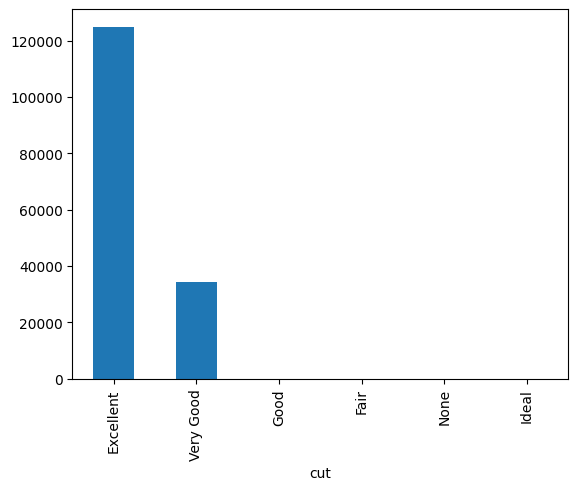

In [19]:
#plot for bar graph
df["cut"].value_counts().plot(kind="bar")

the large number of diamonds is classified as "excellent" cutting grade.

In [20]:
# count how many cut grade on specific symmetry and polish grade
pd.DataFrame(df[["cut","symmetry","polish"]].value_counts())

count
cut       symmetry  polish           
Excellent Excellent Excellent  102722
Very Good Very Good Excellent   14263
Excellent Very Good Excellent   11516
Very Good Very Good Very Good    9843
          Excellent Excellent    8275
Excellent Excellent Very Good    6284
          Very Good Very Good    4335
Very Good Excellent Very Good    1811
Good      Very Good Very Good      15
          Good      Good            4
Very Good Good      Very Good       4
Good      Very Good Excellent       2
Excellent Good      Good            2
Very Good Good      Good            2
Fair      Good      Very Good       2
                    Good            2
Very Good Very Good Good            2
          Good      Excellent       1
None      Very Good Very Good       1
Excellent Good      Excellent       1
                    Very Good       1
Good      Good      Very Good       1
Ideal     Very Good Excellent       1
Good      Fair      Very Good       1
                    Good            1
                    Fair            1
          Excellent Very Good       1
                    Excellent       1
Fair      Fair      Good            1
Good      Good      Excellent       1

In [21]:
# count how many nan value of cut column has specific symmetry and polish
pd.DataFrame(df[df["cut"].isna()][["symmetry","polish"]].value_counts())

count
symmetry  polish          
Very Good Excellent  26588
          Very Good  16422
Excellent Excellent  11248
Good      Very Good   2196
Excellent Very Good   1275
Good      Good        1230
          Excellent   1156
Fair      Good         160
Very Good Good         156
Fair      Very Good    130
          Excellent     31
Good      Fair           5
Poor      Good           3
Excellent Good           2
Poor      Very Good      2
          Fair           1
          Poor           1
Good      Poor           1

In [22]:
# let's fill cut value
# fill "Excellent" if symmetry or polish is/are excellent
df["cut"] = np.where(df["cut"].isna() & ((df["symmetry"] == "Excellent") | (df["polish"] == "Excellent")),
                     "Excellent", df["cut"])

# fill "Very Good" if symmetry and polish are very good
df["cut"] = np.where(df["cut"].isna() & ((df["symmetry"] == "Very Good") & (df["polish"] == "Very Good")),
                     "Very Good", df["cut"])

# otherwise, fill "Good"
df['cut'] = np.where(df["cut"].isna(), "Good", df['cut'])

In [23]:
df["cut"].value_counts()

cut
Excellent    165161
Very Good     50623
Good           3913
Fair              5
None              1
Ideal             1
Name: count, dtype: int64

In [24]:
df["cut"].isna().sum()

0

### handling girdle_min, girdle_max, and culet_size

In [25]:
df.isna().sum()

shape                     0
size                      0
clarity                   0
cut                       0
symmetry                  0
polish                    0
depth_percent             0
table_percent             0
meas_length               0
meas_width                0
meas_depth                0
girdle_min            83433
girdle_max            84296
culet_size            85741
culet_condition      204385
fluor_color          203978
fluor_intensity         128
lab                       0
total_sales_price         0
eye_clean            156917
date                      0
color_type                0
dtype: int64

<Axes: xlabel='girdle_min'>

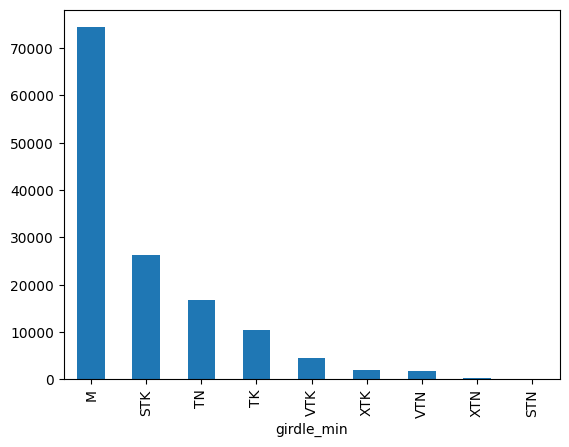

In [26]:

# plot girdle_min bar graph
df["girdle_min"].value_counts().plot(kind = "bar")

<Axes: xlabel='girdle_max'>

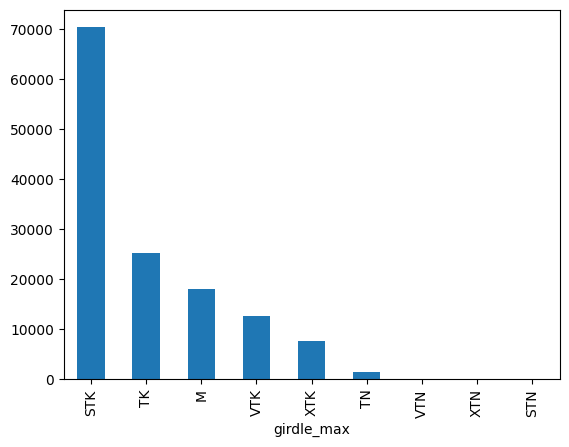

In [27]:
# plot girdle_max bar graph
df["girdle_max"].value_counts().plot(kind = "bar")

In [28]:
# how large of dataset
len(df)

219704

In [29]:
# count how many diamonds got lack of both girdle_min, girdle_max data 
len(df[df["girdle_min"].isna() & df["girdle_max"].isna()])

83414

almost of girdle_min missing occured with girdle_max missing

In [30]:
# count how many diamonds got lack of girdle_min, girdle_max data, and culet_size
len(df[df["girdle_min"].isna() & df["girdle_max"].isna() & df["culet_size"].isna()])

66695

can't summary that missed of gardle detail affected to culet

In [31]:
# count how many diamonds got lack of both girdle_min, girdle_max data 
len(df[df["girdle_min"].isna() & df["girdle_max"].isna()]) / len(df)

0.3796653679496049

let's drop it because we can't properly impute these two variable.<br>
the missing values are 38% of dataset. To imputing girdle_min, we should know<br>
girdle max for upper-bound girdle size.<br>

So, we have 2 ways to manipulate girdle_min and girdle_max :  
(1) drop columns - no effect amount of row, learning is less complex.<br>
(2) drop rows which have nan - remove 38% of dataset, but price is probably founded<br>
correlate to girdle later.

we choose (1). Let's drop them

In [32]:
df.drop(["girdle_max","girdle_min"], axis=1, inplace = True)

For culet size searching, we found that culet size can be None(N) for <br>
very small size of culet. 

information source : https://www.brilliance.com/education/diamonds/culet

In [33]:
df["culet_size"].value_counts()

culet_size
N     131899
VS      1345
S        476
M        163
L         58
SL        14
EL         4
VL         4
Name: count, dtype: int64

from `value_count()`, we see N(None) is the most frequent culet_size.<br>
So, It's a great idea to impute null value in "culet" column to N.

In [34]:
df['culet_size'] = np.where(df['culet_size'].isna(), "N", df['culet_size'])

In [35]:
df.isna().sum()

shape                     0
size                      0
clarity                   0
cut                       0
symmetry                  0
polish                    0
depth_percent             0
table_percent             0
meas_length               0
meas_width                0
meas_depth                0
culet_size                0
culet_condition      204385
fluor_color          203978
fluor_intensity         128
lab                       0
total_sales_price         0
eye_clean            156917
date                      0
color_type                0
dtype: int64

### drop columns that have greater than 50% missing value

In [36]:
def missrate(df):
    for col in df.columns:
        print(f"{col}'s missing ratio : {(len(df[df[col].isna()])/len(df))*100:.2f} %")

missrate(df)

shape's missing ratio : 0.00 %
size's missing ratio : 0.00 %
clarity's missing ratio : 0.00 %
cut's missing ratio : 0.00 %
symmetry's missing ratio : 0.00 %
polish's missing ratio : 0.00 %
depth_percent's missing ratio : 0.00 %
table_percent's missing ratio : 0.00 %
meas_length's missing ratio : 0.00 %
meas_width's missing ratio : 0.00 %
meas_depth's missing ratio : 0.00 %
culet_size's missing ratio : 0.00 %
culet_condition's missing ratio : 93.03 %
fluor_color's missing ratio : 92.84 %
fluor_intensity's missing ratio : 0.06 %
lab's missing ratio : 0.00 %
total_sales_price's missing ratio : 0.00 %
eye_clean's missing ratio : 71.42 %
date's missing ratio : 0.00 %
color_type's missing ratio : 0.00 %


In [37]:
df.drop(["culet_condition", "fluor_color", "eye_clean"], axis =1, inplace= True)

In [38]:
df.isna().sum()

shape                  0
size                   0
clarity                0
cut                    0
symmetry               0
polish                 0
depth_percent          0
table_percent          0
meas_length            0
meas_width             0
meas_depth             0
culet_size             0
fluor_intensity      128
lab                    0
total_sales_price      0
date                   0
color_type             0
dtype: int64

### handling fluor_intensity

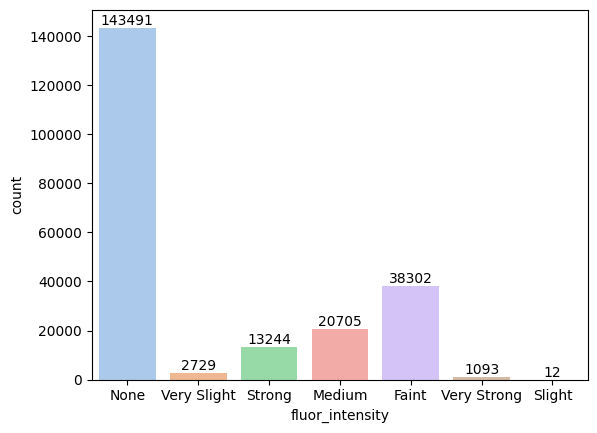

In [39]:
ax = sns.countplot(data=df, x="fluor_intensity", palette='pastel')
ax.bar_label(ax.containers[0])
plt.show()

we could see that flour_intensity mostly be 'None',  
so we are going to fill `null` value with `None` 

In [40]:
df["fluor_intensity"].fillna("None", inplace=True)

In [41]:
df["fluor_intensity"].isna().sum()

0

### handling date

In [42]:
df["date"].unique()

array(['2022-02-24'], dtype=object)

date column has only one value, let's drop date column

In [43]:
df.drop("date", axis =1, inplace= True)

## numerical-value column

In [44]:
df

,shape,size,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,culet_size,fluor_intensity,lab,total_sales_price,color_type
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,N,None,IGI,200,E_X_X_X_X_E
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,N,None,IGI,200,E_X_X_X_X_E
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,N,None,IGI,200,E_X_X_X_X_E
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,N,None,IGI,200,E_X_X_X_X_E
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,N,None,IGI,200,E_X_X_X_X_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,N,None,GIA,1210692,E_X_X_X_X_E
219700,Radiant,5.17,VS2,Very Good,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,N,None,GIA,1292500,X_Green_X_None_Fancy Light_X
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,N,None,GIA,1315496,E_X_X_X_X_E
219702,Princess,0.90,SI2,Good,Good,Good,70.8,72.0,5.22,4.90,3.47,N,Faint,GIA,1350000,X_Red_X_X_Fancy_X


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape              219704 non-null  object 
 1   size               219704 non-null  float64
 2   clarity            219704 non-null  object 
 3   cut                219704 non-null  object 
 4   symmetry           219704 non-null  object 
 5   polish             219704 non-null  object 
 6   depth_percent      219704 non-null  float64
 7   table_percent      219704 non-null  float64
 8   meas_length        219704 non-null  float64
 9   meas_width         219704 non-null  float64
 10  meas_depth         219704 non-null  float64
 11  culet_size         219704 non-null  object 
 12  fluor_intensity    219704 non-null  object 
 13  lab                219704 non-null  object 
 14  total_sales_price  219704 non-null  int64  
 15  color_type         219704 non-null  object 
dtypes:

### the zeroes values in meas' shape columns
the width/depth/length of diamonds can't be zeros,<br>
drop rows which three features are 0. 

In [46]:
# count how many zero values row
len(df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )])

1793

In [47]:
index = df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )].index
df.drop(index , inplace=True)

In [48]:
len(df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )])

0

### derived column
in this dataset, depth_percent is approximately calculated by (200\*z)/(x+y).<br>
we could regress before we train our model.

In [49]:
# prove equation
temp = df.loc[:, ["meas_length","meas_width","meas_depth","depth_percent"]]
temp.loc[:, ["depth_r"]] = np.zeros(len(temp))

In [50]:
temp.loc[:, ["depth_r"]] = np.where(df["depth_percent"].notna(), (200*df["meas_depth"])/(df["meas_length"]+df["meas_width"]), temp["depth_r"])

In [51]:
temp

,meas_length,meas_width,meas_depth,depth_percent,depth_r
0,2.85,2.87,1.79,62.7,62.587413
1,2.84,2.89,1.78,61.9,62.129145
2,2.88,2.90,1.77,61.1,61.245675
3,2.86,2.88,1.78,62.0,62.020906
4,2.79,2.83,1.82,64.9,64.768683
...,...,...,...,...,...
219699,14.06,14.18,8.66,61.3,61.331445
219700,11.55,8.81,5.71,64.8,56.090373
219701,17.06,17.10,10.20,60.2,59.718970
219702,5.22,4.90,3.47,70.8,68.577075


depth_r and depth_percent are similar.

In [52]:
df.drop("depth_percent", axis =1, inplace= True)

In [53]:
df

,shape,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,fluor_intensity,lab,total_sales_price,color_type
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,59.0,2.85,2.87,1.79,N,None,IGI,200,E_X_X_X_X_E
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,59.0,2.84,2.89,1.78,N,None,IGI,200,E_X_X_X_X_E
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,59.0,2.88,2.90,1.77,N,None,IGI,200,E_X_X_X_X_E
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,59.0,2.86,2.88,1.78,N,None,IGI,200,E_X_X_X_X_E
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,58.5,2.79,2.83,1.82,N,None,IGI,200,E_X_X_X_X_E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,58.0,14.06,14.18,8.66,N,None,GIA,1210692,E_X_X_X_X_E
219700,Radiant,5.17,VS2,Very Good,Very Good,Very Good,65.0,11.55,8.81,5.71,N,None,GIA,1292500,X_Green_X_None_Fancy Light_X
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,59.0,17.06,17.10,10.20,N,None,GIA,1315496,E_X_X_X_X_E
219702,Princess,0.90,SI2,Good,Good,Good,72.0,5.22,4.90,3.47,N,Faint,GIA,1350000,X_Red_X_X_Fancy_X


### abnormally data point detection

In [54]:
# plot pair plot for abnormaly detection
# sns.pairplot(df)

![pairplot abnomal](public/pairplot_abnormal.png)

you'll see abnormally data point on meas' shape graph. <br>
(1) dataset may contain two groups of population, from the clusters <br>
that we see in the meas_depth and table_percent graph.<br>
(2) In meas_length and meas_width, there are possibly errors.<br>

let's look inside how many of them by giving<br>
(1) meas_length > 50<br>
(2) meas_width >35

In [55]:
df[ (df["meas_length"] >50) | (df["meas_width"] > 35) ]

,shape,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,fluor_intensity,lab,total_sales_price,color_type
31860,Round,0.23,VVS1,Excellent,Excellent,Excellent,60.0,3.97,40.00,2.39,N,Faint,GIA,822,E_X_X_X_X_E
31870,Round,0.23,VVS1,Excellent,Excellent,Excellent,60.0,3.97,40.00,2.39,N,Faint,GIA,822,E_X_X_X_X_E
43810,Round,0.30,VS1,Excellent,Excellent,Excellent,61.0,4.40,43.70,2.60,N,Faint,GIA,898,G_X_X_X_X_G
110251,Radiant,0.35,VS1,Good,Very Good,Good,0.6,93.66,3.76,2.63,N,None,GIA,1986,X_Brown_X_Pinkish_Faint_X
169663,Round,0.81,SI1,Excellent,Excellent,Excellent,58.0,5.95,62.10,3.68,N,Faint,GIA,5848,D_X_X_X_X_D
171859,Round,0.91,VS1,Excellent,Excellent,Excellent,56.0,6.23,62.00,3.86,N,Faint,GIA,6359,I_X_X_X_X_I
190863,Round,1.03,VVS1,Excellent,Excellent,Excellent,0.0,57.50,62.30,4.02,N,None,IGI,10027,G_X_X_X_X_G
212138,Emerald,2.40,IF,Excellent,Very Good,Excellent,67.0,60.45,9.04,4.23,N,None,GIA,30586,I_X_X_X_X_I


In [56]:
# drop it
index = df[ (df["meas_length"] >50) | (df["meas_width"] > 35) ].index
df.drop(index , inplace=True)

In [57]:
# sns.pairplot(df)

![pairplot after](public/pairplot_after.png)

## turn categorical value to numerical value 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217903 entries, 0 to 219703
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape              217903 non-null  object 
 1   size               217903 non-null  float64
 2   clarity            217903 non-null  object 
 3   cut                217903 non-null  object 
 4   symmetry           217903 non-null  object 
 5   polish             217903 non-null  object 
 6   table_percent      217903 non-null  float64
 7   meas_length        217903 non-null  float64
 8   meas_width         217903 non-null  float64
 9   meas_depth         217903 non-null  float64
 10  culet_size         217903 non-null  object 
 11  fluor_intensity    217903 non-null  object 
 12  lab                217903 non-null  object 
 13  total_sales_price  217903 non-null  int64  
 14  color_type         217903 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 26.6+ M

In [59]:
# unique category of columns (ordinary)
dict_unique = {
                "cut" : np.unique(df.cut),
               "color_type" : np.unique(df.color_type),
               "clarity" : np.unique(df.clarity),
               "symmetry" : np.unique(df.symmetry),
               "polish" : np.unique(df.polish),
               "culet_size" : np.unique(df.culet_size)}

uniq_df = pd.DataFrame.from_dict(dict_unique, orient='index')
uniq_df.T

,cut,color_type,clarity,symmetry,polish,culet_size
0,Excellent,D_X_X_Greenish_X_D,I1,Excellent,Excellent,EL
1,Fair,D_X_X_None_X_D,I2,Fair,Fair,L
2,Good,D_X_X_X_X_D,I3,Good,Good,M
3,Ideal,D_X_X_Yellowish_X_D,IF,Poor,Poor,N
4,None,E_X_X_None_X_E,SI1,Very Good,Very Good,S
...,...,...,...,...,...,...
302,None,X_Yellow_X_X_Light_X,None,None,None,None
303,None,X_Yellow_X_X_Very Light_X,None,None,None,None
304,None,X_Yellow_Yellow_X_Fancy Intense_X,None,None,None,None
305,None,X_Yellow_Yellow_X_Fancy Light_X,None,None,None,None


In [60]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['color_type']= label_encoder.fit_transform(df['color_type'])
  
df['color_type'].unique()

array([  5,   8,   2,  15,  13,  10,  12,  24,  21,  18, 170,  14,  78,
       301,  23, 198,  25,  71, 303, 262, 288, 286,  22, 220,  17,  19,
        85,  77, 297, 100, 298, 276, 285, 274, 225, 215,  88, 296, 245,
        79, 218, 271, 174, 270, 109, 300,  76, 182,  70,  72, 304, 167,
       302, 110, 284, 299,  84,  65,  59, 103,  89,  42, 202,  60, 222,
        36, 208, 221,  52, 129, 181, 264, 160, 132,  43, 159, 268, 269,
       137, 255, 243, 247, 185, 240, 292, 138,  67, 279, 184, 209, 186,
       201,  69, 178, 213,  53, 136, 291, 152, 290, 107, 242, 153, 111,
        68, 191, 223, 187, 169, 177,  46, 282, 272, 194,  73, 144, 130,
       179, 155, 295, 261, 244,  50, 134, 246,  87, 216, 266, 192, 121,
       176, 293, 142,  41,   1, 265,  82, 287, 239, 141, 238, 256, 148,
       275, 165,  51,  75, 147,  37, 249, 180, 156,  20,  49, 278, 283,
         7,  57, 280, 254, 217, 175,  58, 188,  47, 197, 235,   4, 173,
       230, 241, 267, 257, 112, 158,  74,  81,  80, 171, 150, 25

In [61]:
# from column dictionary, categories tell how good quality/criteria/level
# of diamond in specific measurement (worst-best)

cutp = {"None" : 1, "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5 , "Ideal" : 6}
clarityp = {"I3" : 1, "I2" : 2, "I1" : 3, "SI2" : 4 , "SI1" : 5, "VS2" : 6, "VS1" : 7, "VVS2" : 8, "VVS1" : 9, "IF" : 10 }
symmetryp = {"Poor" : 1 , "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5}
polishp = {"Poor" : 1 , "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5}
culet_sizep = { "EL" : 1, "VL" : 2, "L" : 3, "SL" : 4, "M" : 5,"S" : 6, "VS" : 7, "N" : 8}
fluor_intensityp = {"Very Strong" : 1, "Strong" : 2, "Medium" : 3, "Slight" : 4 ,"Very Slight" : 5, "Faint" : 6 , "None" : 7}

def fillp(dataframe ,col ,dictp):
    dataframe.loc[:,[col]] = dataframe.loc[:,[col]].replace(dictp)

fillp(df, "cut", cutp)
fillp(df, "clarity", clarityp)
fillp(df, "symmetry", symmetryp)
fillp(df, "polish", polishp)
fillp(df, "culet_size", culet_sizep)
fillp(df, "fluor_intensity", fluor_intensityp)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217903 entries, 0 to 219703
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape              217903 non-null  object 
 1   size               217903 non-null  float64
 2   clarity            217903 non-null  object 
 3   cut                217903 non-null  object 
 4   symmetry           217903 non-null  object 
 5   polish             217903 non-null  object 
 6   table_percent      217903 non-null  float64
 7   meas_length        217903 non-null  float64
 8   meas_width         217903 non-null  float64
 9   meas_depth         217903 non-null  float64
 10  culet_size         217903 non-null  object 
 11  fluor_intensity    217903 non-null  object 
 12  lab                217903 non-null  object 
 13  total_sales_price  217903 non-null  int64  
 14  color_type         217903 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(8)
memory usag

In [63]:
df

,shape,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,fluor_intensity,lab,total_sales_price,color_type
0,Round,0.09,8,5,4,4,59.0,2.85,2.87,1.79,8,7,IGI,200,5
1,Round,0.09,8,4,4,4,59.0,2.84,2.89,1.78,8,7,IGI,200,5
2,Round,0.09,8,5,4,4,59.0,2.88,2.90,1.77,8,7,IGI,200,5
3,Round,0.09,8,5,4,4,59.0,2.86,2.88,1.78,8,7,IGI,200,5
4,Round,0.09,8,4,4,5,58.5,2.79,2.83,1.82,8,7,IGI,200,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,7,5,5,5,58.0,14.06,14.18,8.66,8,7,GIA,1210692,5
219700,Radiant,5.17,6,4,4,4,65.0,11.55,8.81,5.71,8,7,GIA,1292500,127
219701,Round,18.07,7,5,5,5,59.0,17.06,17.10,10.20,8,7,GIA,1315496,5
219702,Princess,0.90,4,3,3,3,72.0,5.22,4.90,3.47,8,6,GIA,1350000,236


In [64]:
# using one-hot encoding with get_dummies for lab column

dummies = pd.get_dummies(df['lab'])
df_f = pd.concat([df, dummies], axis = 1).drop("lab", axis = 1)
df_f

,shape,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,fluor_intensity,total_sales_price,color_type,GIA,HRD,IGI
0,Round,0.09,8,5,4,4,59.0,2.85,2.87,1.79,8,7,200,5,False,False,True
1,Round,0.09,8,4,4,4,59.0,2.84,2.89,1.78,8,7,200,5,False,False,True
2,Round,0.09,8,5,4,4,59.0,2.88,2.90,1.77,8,7,200,5,False,False,True
3,Round,0.09,8,5,4,4,59.0,2.86,2.88,1.78,8,7,200,5,False,False,True
4,Round,0.09,8,4,4,5,58.5,2.79,2.83,1.82,8,7,200,5,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,7,5,5,5,58.0,14.06,14.18,8.66,8,7,1210692,5,True,False,False
219700,Radiant,5.17,6,4,4,4,65.0,11.55,8.81,5.71,8,7,1292500,127,True,False,False
219701,Round,18.07,7,5,5,5,59.0,17.06,17.10,10.20,8,7,1315496,5,True,False,False
219702,Princess,0.90,4,3,3,3,72.0,5.22,4.90,3.47,8,6,1350000,236,True,False,False


## basic analysis about price of diamond and fancy color features

<Axes: xlabel='fancy_color_dominant_color'>

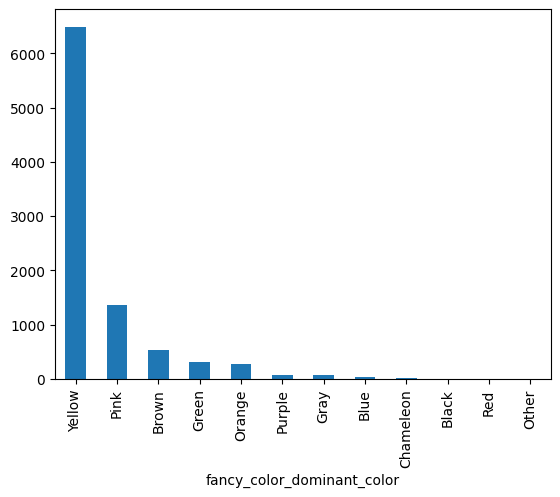

In [65]:

# plot graph of fancy color diamonds
main_df["fancy_color_dominant_color"].value_counts().plot(kind = "bar")

From researching and experiment with this dataset, <br>
the price of diamonds increased when they have fancy color and rarity. 

In [66]:
main_df[main_df["color"].isna()].total_sales_price.mean()

19166.86978825584

In [67]:

main_df[main_df["color"].notna()].total_sales_price.mean()

6374.576550047022

<Axes: xlabel='fancy_color_dominant_color'>

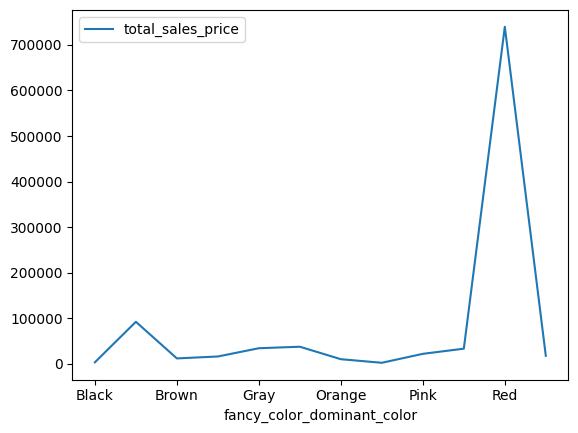

In [68]:
pd.pivot_table(main_df[main_df["fancy_color_dominant_color"].notna()],
               values="total_sales_price", columns="fancy_color_dominant_color",
               aggfunc = np.mean).T.plot()

In [69]:
# fill null value with last column "fancy_color_intensity"
main_df["fancy_color_intensity"].unique()

array([nan, 'Fancy', 'Very Light', 'Faint', 'Fancy Light', 'Light',
       'Fancy Deep', 'Fancy Intense', 'Fancy Dark', 'Fancy Vivid'],
      dtype=object)

In [70]:
# using one-hot encoding with get_dummies for shape column
dummies = pd.get_dummies(df_f['shape'])
df_f = pd.concat([df_f, dummies], axis = 1).drop("shape", axis = 1)
df_f

,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,...,Cushion,Cushion Modified,Emerald,Heart,Marquise,Oval,Pear,Princess,Radiant,Round
0,0.09,8,5,4,4,59.0,2.85,2.87,1.79,8,...,False,False,False,False,False,False,False,False,False,True
1,0.09,8,4,4,4,59.0,2.84,2.89,1.78,8,...,False,False,False,False,False,False,False,False,False,True
2,0.09,8,5,4,4,59.0,2.88,2.90,1.77,8,...,False,False,False,False,False,False,False,False,False,True
3,0.09,8,5,4,4,59.0,2.86,2.88,1.78,8,...,False,False,False,False,False,False,False,False,False,True
4,0.09,8,4,4,5,58.5,2.79,2.83,1.82,8,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,10.65,7,5,5,5,58.0,14.06,14.18,8.66,8,...,False,False,False,False,False,False,False,False,False,True
219700,5.17,6,4,4,4,65.0,11.55,8.81,5.71,8,...,False,False,False,False,False,False,False,False,True,False
219701,18.07,7,5,5,5,59.0,17.06,17.10,10.20,8,...,False,False,False,False,False,False,False,False,False,True
219702,0.90,4,3,3,3,72.0,5.22,4.90,3.47,8,...,False,False,False,False,False,False,False,True,False,False


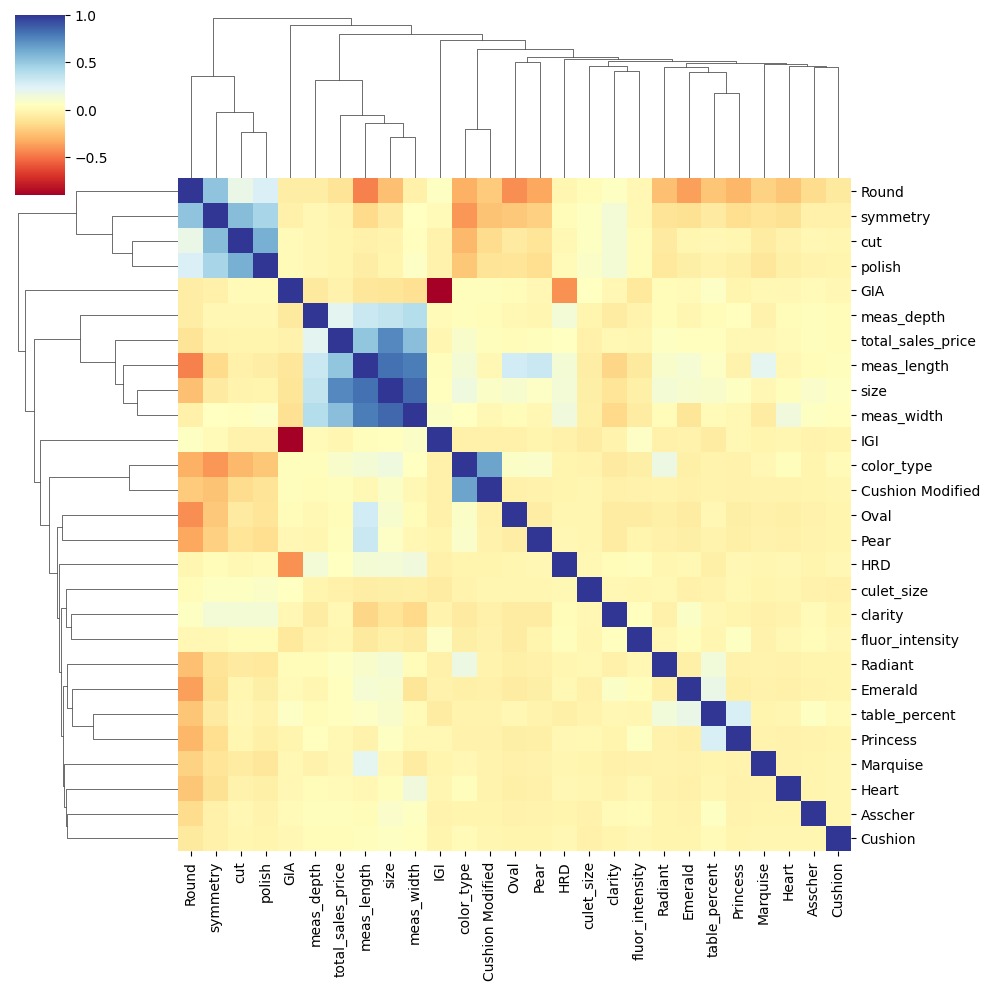

In [71]:
# plot cluster map
sns.clustermap(df_f.corr(), cmap='RdYlBu')

In [72]:
df_f.corr()

,size,clarity,cut,symmetry,polish,table_percent,meas_length,meas_width,meas_depth,culet_size,...,Cushion,Cushion Modified,Emerald,Heart,Marquise,Oval,Pear,Princess,Radiant,Round
size,1.000000,-0.107673,-0.015416,-0.066808,-0.014428,0.094491,0.819670,0.847173,0.352608,-0.048158,...,0.061994,0.077710,0.100090,0.037519,0.001019,0.099948,0.071761,0.064124,0.120612,-0.263058
clarity,-0.107673,1.000000,0.120450,0.131472,0.124321,0.007064,-0.173029,-0.162771,-0.061137,0.005652,...,-0.008198,-0.036974,0.076854,-0.017485,-0.036189,-0.060267,-0.066245,-0.007984,-0.029951,0.062610
cut,-0.015416,0.120450,1.000000,0.551417,0.604721,0.004250,-0.034028,0.044612,0.003534,0.061366,...,-0.003303,-0.143091,-0.000662,-0.024255,-0.065658,-0.068146,-0.104911,-0.005278,-0.070038,0.179466
symmetry,-0.066808,0.131472,0.551417,1.000000,0.444033,-0.072703,-0.154905,0.058647,0.000552,0.060544,...,-0.031047,-0.247843,-0.119145,-0.125088,-0.110619,-0.225565,-0.199050,-0.136765,-0.116941,0.519483
polish,-0.014428,0.124321,0.604721,0.444033,1.000000,-0.020624,-0.058964,0.068567,0.007126,0.075522,...,-0.007947,-0.112489,-0.045313,-0.043483,-0.091475,-0.105089,-0.140524,-0.038528,-0.085321,0.264339
table_percent,0.094491,0.007064,0.004250,-0.072703,-0.020624,1.000000,0.072206,0.019378,0.032001,-0.017947,...,0.018655,-0.017637,0.182404,-0.000261,-0.010244,0.003665,-0.020685,0.268871,0.139089,-0.241587
meas_length,0.819670,-0.173029,-0.034028,-0.154905,-0.058964,0.072206,1.000000,0.784937,0.321935,-0.055312,...,0.039718,0.011186,0.114923,0.005679,0.213625,0.291034,0.322315,-0.027606,0.089908,-0.453901
meas_width,0.847173,-0.162771,0.044612,0.058647,0.068567,0.019378,0.784937,1.000000,0.399701,-0.041939,...,0.047491,0.013039,-0.098666,0.141275,-0.062270,0.028191,0.001181,0.007908,0.025751,-0.031340
meas_depth,0.352608,-0.061137,0.003534,0.000552,0.007126,0.032001,0.321935,0.399701,1.000000,-0.014590,...,0.025006,0.024083,-0.001453,0.031916,-0.028281,0.010856,-0.006623,0.051438,0.034448,-0.056131
culet_size,-0.048158,0.005652,0.061366,0.060544,0.075522,-0.017947,-0.055312,-0.041939,-0.014590,1.000000,...,-0.033925,-0.000320,-0.030931,-0.000979,-0.013421,-0.001907,-0.006913,0.013018,0.008346,0.023879


# training model with linear regression

In [73]:
# import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create evaluation function
def evaluation_matric(X_test, y_test, model):
    print("Regression metrics on the test set")
    y_preds = model.predict(X_test)  
    r2 = r2_score(y_true = y_test, y_pred = y_preds )
    MAE = mean_absolute_error(y_true = y_test, y_pred = y_preds )
    MSE = mean_squared_error(y_true = y_test, y_pred = y_preds )
    print(f"r2_score : {r2} ")
    print(f"MAE : {MAE} ")
    print(f"MSE : {MSE} ")
    return {"R2" : r2, "MAE" : MAE, "MSE" : MSE}

In [74]:
# import estimator and spliting module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# set random seed
np.random.seed(42)

# split features and target
X_lr = df_f.drop(["total_sales_price"], axis = 1)
y_lr = df_f["total_sales_price"]

# split dataset to training set and test set
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2)

# fit the model
lr_rgs_A = LinearRegression()
lr_rgs_A.fit(X_lr_train, y_lr_train)

LinearRegression()

In [75]:
evaluation_matric(X_test=X_lr_test, y_test=y_lr_test, model= lr_rgs_A)

Regression metrics on the test set
r2_score : 0.6234987626918027 
MAE : 3835.1896266173503 
MSE : 273127121.8627599 


{'R2': 0.6234987626918027, 'MAE': 3835.1896266173503, 'MSE': 273127121.8627599}

In [76]:
# show difference between prediction and actual value
cmp_lr = pd.DataFrame()
y_lr_preds = lr_rgs_A.predict(X_lr_test)
cmp_lr.insert(0, 'y_preds', y_lr_preds)
y_test_lr = y_lr_test.reset_index()
cmp_lr.insert(1, 'y_test', y_test_lr.loc[:, ["total_sales_price"]])
cmp_lr.loc[:, ['diff']] = cmp_lr["y_preds"] - cmp_lr["y_test"]
cmp_lr

,y_preds,y_test,diff
0,-1555.672753,1886,-3441.672753
1,8226.600024,8642,-415.399976
2,6340.456841,6093,247.456841
3,3615.693625,2588,1027.693625
4,3996.820013,1072,2924.820013
...,...,...,...
43576,49264.667345,46018,3246.667345
43577,8088.149469,5615,2473.149469
43578,6623.173117,8043,-1419.826883
43579,1994.148494,3506,-1511.851506


# training model with sklearn regression

In [77]:
# import estimator 
from sklearn.ensemble import RandomForestRegressor

In [78]:
X_rf = df_f.drop(["total_sales_price"], axis = 1)
y_rf = df_f["total_sales_price"]

np.random.seed(42)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.2)

rf_rgs1 = RandomForestRegressor()
rf_rgs1.fit(X_rf_train, y_rf_train)

RandomForestRegressor()

In [79]:
evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs1)

Regression metrics on the test set
r2_score : 0.8337334631990067 
MAE : 950.9528027128781 
MSE : 120615541.62004144 


{'R2': 0.8337334631990067, 'MAE': 950.9528027128781, 'MSE': 120615541.62004144}

In [80]:
# show difference between prediction and actual value
cmp_rf = pd.DataFrame()
y_rf_preds = rf_rgs1.predict(X_rf_test)
cmp_rf.insert(0, 'y_preds', y_rf_preds)
y_test_rf = y_rf_test.reset_index()
cmp_rf.insert(1, 'y_test', y_test_rf.loc[:, ["total_sales_price"]])
cmp_rf.loc[:, ['diff']] = cmp_rf["y_preds"] - cmp_rf["y_test"]
cmp_rf

,y_preds,y_test,diff
0,1884.920000,1886,-1.080000
1,9419.390000,8642,777.390000
2,6750.390000,6093,657.390000
3,2692.140000,2588,104.140000
4,1066.208333,1072,-5.791667
...,...,...,...
43576,47264.220000,46018,1246.220000
43577,4941.430000,5615,-673.570000
43578,7999.010000,8043,-43.990000
43579,3582.080000,3506,76.080000


In [81]:
# get all current parameters
rf_rgs1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter tuning with RandomizedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# the interval/set of value that will be assigned to model training
grids = {"n_estimators" : [10,100,200,500,1000],
        "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : [1, None,"sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]}

# use every unit for processing
rf = RandomForestRegressor(n_jobs = -1)

# start model fittings
rf_rgs2 = RandomizedSearchCV(estimator = rf,
                           param_distributions = grids,
                           n_iter = 20, 
                           cv = 5,
                           verbose = 2 )
rf_rgs2.fit(X_rf_train, y_rf_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': [1, None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [83]:
# get best parameters
rf_rgs2.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 20}

In [84]:
evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs2)

Regression metrics on the test set
r2_score : 0.8461835896232472 
MAE : 932.1461616146443 
MSE : 111583785.91747844 


{'R2': 0.8461835896232472, 'MAE': 932.1461616146443, 'MSE': 111583785.91747844}

In [85]:
# show difference between prediction and actual value
cmp_rf = pd.DataFrame()
y_rf_preds = rf_rgs2.predict(X_rf_test)
cmp_rf.insert(0, 'y_preds', y_rf_preds)
y_test_rf = y_rf_test.reset_index()
cmp_rf.insert(1, 'y_test', y_test_rf.loc[:, ["total_sales_price"]])
cmp_rf.loc[:, ['diff']] = cmp_rf["y_preds"] - cmp_rf["y_test"]
cmp_rf

,y_preds,y_test,diff
0,1901.164542,1886,15.164542
1,9698.678735,8642,1056.678735
2,6504.305139,6093,411.305139
3,2707.291752,2588,119.291752
4,1095.646654,1072,23.646654
...,...,...,...
43576,48940.459284,46018,2922.459284
43577,4869.349900,5615,-745.650100
43578,7983.759965,8043,-59.240035
43579,3589.192716,3506,83.192716


# Score summary plot

In [86]:
# create score comparison table
lr_metrics = evaluation_matric(X_test=X_lr_test, y_test=y_lr_test, model= lr_rgs_A)
rf1_metrics = evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs1)
rf2_metrics = evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs2)

compare_metrics = pd.DataFrame({
    "LinearRegression" : lr_metrics,
    "RandomForestRegressor" : rf1_metrics,
    "RandomForestRegressor (tuned)" : rf2_metrics
})

compare_metrics

Regression metrics on the test set
r2_score : 0.6234987626918027 
MAE : 3835.1896266173503 
MSE : 273127121.8627599 
Regression metrics on the test set
r2_score : 0.8337334631990067 
MAE : 950.9528027128781 
MSE : 120615541.62004144 
Regression metrics on the test set
r2_score : 0.8461835896232472 
MAE : 932.1461616146441 
MSE : 111583785.91747841 


,LinearRegression,RandomForestRegressor,RandomForestRegressor (tuned)
R2,6.234988e-01,8.337335e-01,8.461836e-01
MAE,3.835190e+03,9.509528e+02,9.321462e+02
MSE,2.731271e+08,1.206155e+08,1.115838e+08


In [87]:
compare_metrics = compare_metrics.T

[Text(0, 0.5, 'MSE')]

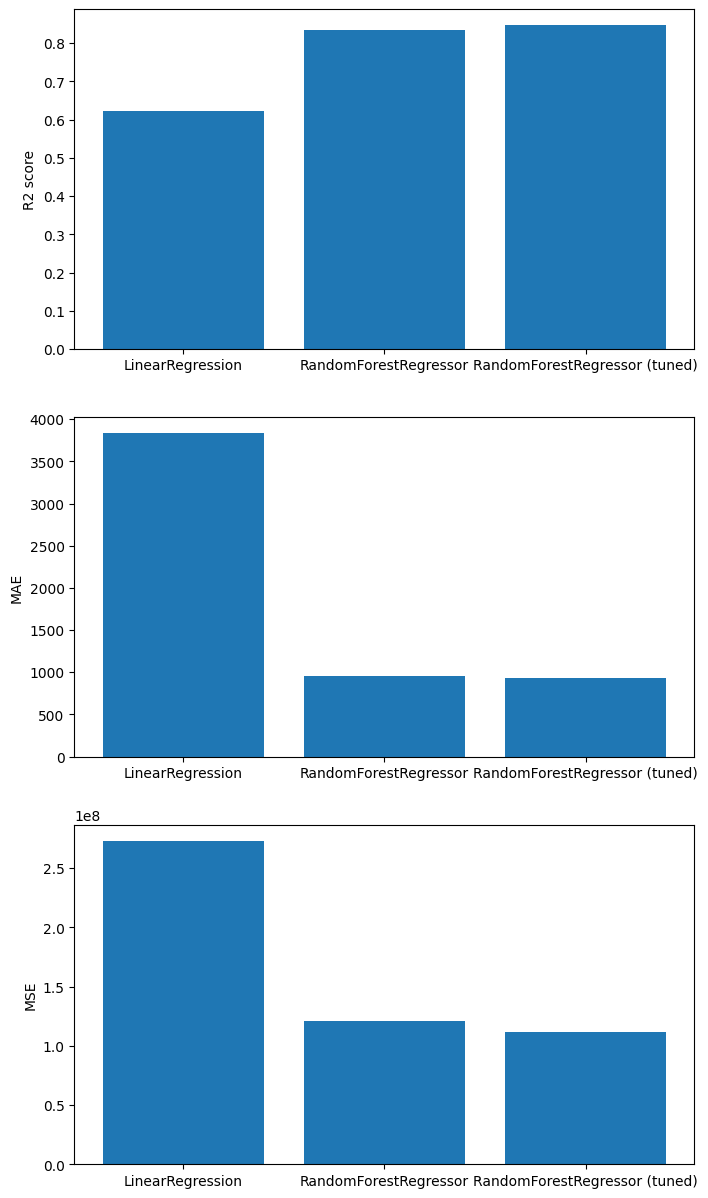

In [90]:
# plot score comparision
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (8,15))

ax0.bar(compare_metrics.index,compare_metrics["R2"])
ax0.set(ylabel = "R2 score")

ax1.bar(compare_metrics.index,compare_metrics["MAE"])
ax1.set(ylabel = "MAE")

ax2.bar(compare_metrics.index,compare_metrics["MSE"])
ax2.set(ylabel = "MSE")

In [91]:
compare_metrics

,R2,MAE,MSE
LinearRegression,0.623499,3835.189627,2.731271e+08
RandomForestRegressor,0.833733,950.952803,1.206155e+08
RandomForestRegressor (tuned),0.846184,932.146162,1.115838e+08


the best estimator for this dataset's regression is RandomForestRegressor with hyperparameter tuning. <br>
It has 0.8438 score (R-square), 973.73 mean absolute error, and 113300651 mean square error.